In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the clean EBS data (no need to process the huge file again)
df = pd.read_csv("ebs_commute_data.csv")


--- 🏆 Unreliability Leaderboard ---


,prob_delay,total_trips,total_delays
train_type,,,
IC,0.607306,438,266
NJ,0.450704,71,32
ICE,0.420680,1412,594
RB,0.385954,3161,1220
RE,0.382884,3599,1378
VIA,0.362640,13774,4995
vlx,0.345976,2373,821
S,0.327063,17648,5772
TR,0.319549,532,170


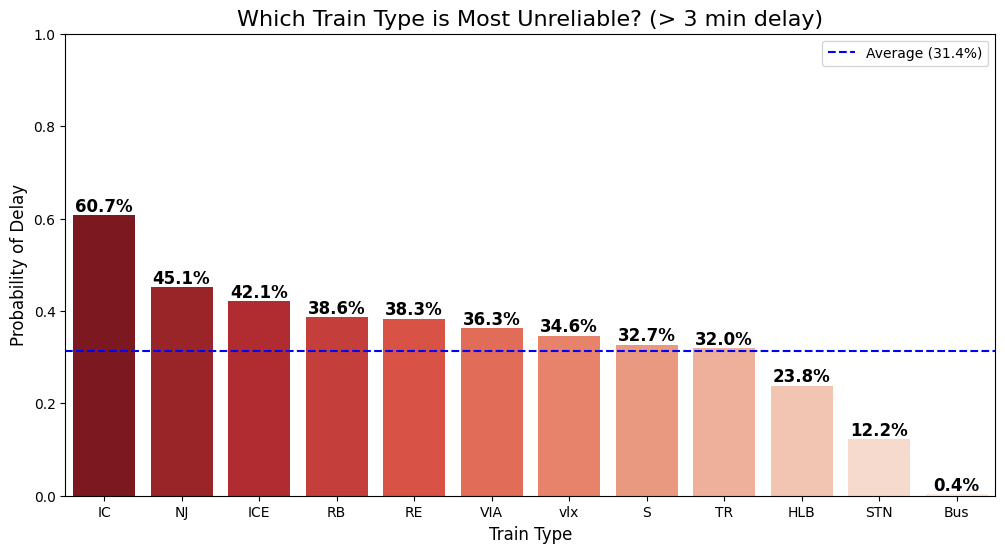

In [9]:
# 2. CONFIGURATION: Define "Late"
# We stick to your strict >3 minute rule
DELAY_THRESHOLD = 3 
df['is_delayed'] = (df['delay_in_min'] > DELAY_THRESHOLD).astype(int)

# 3. ANALYSIS: Group by Train Type
# We want to know: probability of delay AND how many times it ran (to ignore rare trains)
train_stats = df.groupby('train_type')['is_delayed'].agg(['mean', 'count', 'sum'])
train_stats.columns = ['prob_delay', 'total_trips', 'total_delays']

# Filter: Only look at train types that appear frequently (e.g., > 50 times in the month)
# This removes random charter trains or data errors
major_trains = train_stats[train_stats['total_trips'] > 50].sort_values(by='prob_delay', ascending=False)

print("--- 🏆 Unreliability Leaderboard ---")
display(major_trains)
# 4. VISUALIZATION
plt.figure(figsize=(12, 6))


# Create a bar chart
ax = sns.barplot(
    x=major_trains.index, 
    y=major_trains['prob_delay'],
    hue=major_trains.index, # Fixes warning
    legend=False,
    palette="Reds_r" # Dark red = Most unreliable
)

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1%}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha = 'center', va = 'bottom', 
                fontsize=12, fontweight='bold', color='black')

plt.title(f"Which Train Type is Most Unreliable? (> {DELAY_THRESHOLD} min delay)", fontsize=16)
plt.ylabel("Probability of Delay", fontsize=12)
plt.xlabel("Train Type", fontsize=12)
plt.ylim(0, 1) # Scale from 0% to 100%

# Add a reference line for the 'Average' delay across all trains
avg_delay = df['is_delayed'].mean()
plt.axhline(avg_delay, color='blue', linestyle='--', label=f'Average ({avg_delay:.1%})')
plt.legend()

plt.show()